In [1]:
import charts_function_list
import os

In [2]:
base,data,outputs = charts_function_list.folder_setup()
os.chdir(data)

In [185]:
animal

,Date,Alex,Andrea
0,3/27/2019,"Chicken, Pig","Chicken, Pig"
1,3/28/2019,"Dorade, Lamb","Dorade, Lamb, Chicken"
2,3/29/2019,"Chicken, Pig, Cow",Lamb
3,3/30/2019,"Chicken, Shrimp","Chicken, Shrimp"
4,3/31/2019,Chicken,VEG
5,4/1/2019,Chicken,Turkey
6,4/2/2019,"Chicken, Turkey","Chicken, Shrimp"
7,4/3/2019,"Turkey, Salmon","Chicken, Salmon"
8,4/4/2019,NaN,NaN
9,4/5/2019,NaN,NaN


In [186]:
animal = pd.read_csv('a_a_animal.csv')
animal = animal.loc[:7].copy()
animal['Alex Count'] = ''
animal['Andrea Count'] = ''
animal.loc[(animal['Alex']=='VEG'),'Alex Count'] = 0
animal.loc[(animal['Andrea']=='VEG'),'Andrea Count'] = 0
animal['Date'] = pd.to_datetime(animal['Date']).apply(lambda x:x.strftime("%-m/%-d"))

animal['Alex'],animal['Andrea'] = [animal[us].apply(lambda x: x.split(',')) for us in ['Alex','Andrea']]
animal.loc[animal['Andrea'].apply(lambda x:x[0]!='VEG'),'Andrea Count'] = animal.loc[animal['Andrea'].apply(lambda x:x[0]!='VEG'),'Andrea'].apply(lambda x: len(x))
animal.loc[animal['Alex'].apply(lambda x:x[0]!='VEG'),'Alex Count'] = animal.loc[animal['Alex'].apply(lambda x:x[0]!='VEG'),'Alex'].apply(lambda x: len(x))

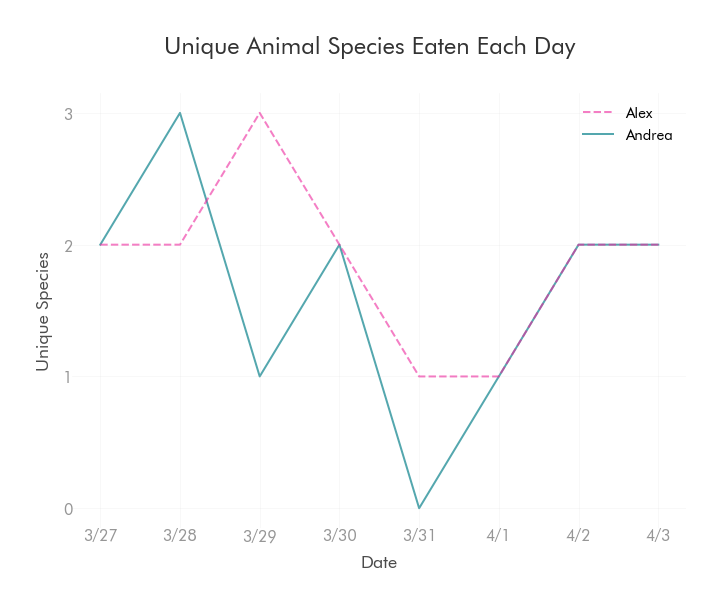

In [194]:
animal_chart = charts_function_list.chart_maker(title='Unique Animal Species Eaten Each Day',title_size=24)
fig = animal_chart.initial_fig_axis()
ax = animal_chart.axes_set_up(fig=fig)
ax.plot(animal.index,animal['Alex Count'].values,linewidth=2,label='Alex',color='#ED289E',alpha=.6,linestyle='--',zorder=2)
ax.plot(animal.index,animal['Andrea Count'].values,linewidth=2,label='Andrea',color='#54A7AE',zorder=1)
ax.legend(fontsize=15)

yticks = ax.set_yticks([int(x) for x in ax.get_yticks()[[x == 0 for x in ax.get_yticks()%1]]])
xtickslabels = ax.set_xticklabels(['']+list(animal['Date'].values))
ax.set_xlabel('Date',fontsize=18,alpha=.7)
ax.set_ylabel('Unique Species',fontsize=18,alpha=.7)
animal_chart.tick_params_(ax=ax)

In [80]:
animal['Alex Animals'] = animal['Alex'].apply(lambda x: len(x))
animal['Andrea Animals'] = animal['Andrea'].apply(lambda x: len(x))

In [90]:
animal.loc[(animal['Alex']!='VEG'),'Alex Count'] = animal.loc[(animal['Alex']!='VEG'),'Alex'].apply(lambda x: len(x))
animal.loc[(animal['Andrea']!='VEG'),'Andrea Count'] = animal.loc[(animal['Andrea']!='VEG'),'Andrea'].apply(lambda x: len(x))

In [95]:
animal.loc[(animal['Andrea']=='VEG')]

,Date,Alex,Andrea,Alex Count,Andrea Count


In [94]:
len([])

0

In [44]:
partial['Alex']

0          [Chicken,  Pig]
1          [Dorade,  Lamb]
2    [Chicken,  Pig,  Cow]
3       [Chicken,  Shrimp]
4                [Chicken]
5                [Chicken]
Name: Alex, dtype: object